# <p style="border-radius:1em;padding:10px;font-family:Times New Roman;font-size:29px;background-color:skyblue;"> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;EXPLORATION_DJ - 1. 인공지능과 가위바위보 하기</p>

## * <b style="color:Green;">과정 순서 : </b>  데이터 준비 -> 네트워크 설계 -> 네트워크 학습 -> 결과 확인하기 

### ♣ 데이터 불러오고 이미지 사이즈 변경

In [1]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [2]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/Jupyter_Notebook/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/Jupyter_Notebook/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/Jupyter_Notebook/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/Jupyter_Notebook/rock_scissor_paper/scissor
가위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/Jupyter_Notebook/rock_scissor_paper/rock
바위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/Jupyter_Notebook/rock_scissor_paper/paper
보 이미지 resize 완료!


### ♣ 이미지 데이터(train, test) 로드하고 Index 하기 

학습데이터(x_train)의 이미지 개수는 3600 입니다.
x_train shape: (3600, 28, 28, 3)
y_train shape: (3600,)
x_train 배열의 크기 :  3600
y_train 배열의 크기 :  3600




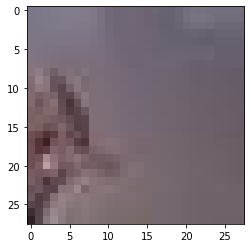

223 번째 이미지의 숫자는 바로  0 입니다.


학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)
x_test 배열의 크기 :  300
y_test 배열의 크기 :  300




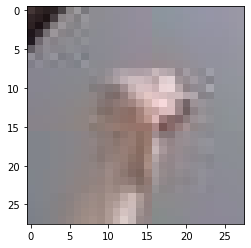

101 번째 이미지의 숫자는 바로  1 입니다.


In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

#함수 시작 ===============================================================
def load_data(img_path, number_of_data):
    # 가위 : 0, 바위 : 1, 보 : 2
    #number_of_data=2700   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels
#함수 종료 ======================================================================

#불러올 디렉토리 train Path 
image_dir_path = os.getenv("HOME") + "/Jupyter_Notebook/rock_scissor_paper"
#train 데이터 불러오기
(x_train, y_train)=load_data(image_dir_path, 3600)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_train 배열의 크기 : " , len(x_train))  # x_train 배열의 크기를 출력
print("y_train 배열의 크기 : " , len(y_train))  # y_train 배열의 크기를 출력
print("\n")

#이미지 파일 열어서 보고, index 확인하기
index=222     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')
print("\n")

#불러올 디렉토리 test Path 
image_dir_path = os.getenv("HOME") + "/Jupyter_Notebook/rock_scissor_paper_Test"
#train 데이터 불러오기
(x_test, y_test)=load_data(image_dir_path, 300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))
print("x_test 배열의 크기 : " , len(x_test))  # x_test 배열의 크기를 출력
print("y_test 배열의 크기 : " , len(y_test))  # y_test 배열의 크기를 출력
print("\n")

#이미지 파일 열어서 보고, index 확인하기
index=100     
plt.imshow(x_test[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_test[index], '입니다.')



### ♣  딥러닝 네트워크 모델 설계하기

In [4]:
#모델 만들기
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (No

### ♣ Reshape

In [5]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (3600, 28, 28, 3)
Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_train_reshaped shape: (3600, 28, 28, 3)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)


 ### ♣ 딥러닝 네트워크 학습 : compile  Fit

In [6]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

Epoch 1/10
113/113 [==============================] - 4s 31ms/step - loss: 1.0715 - accuracy: 0.4069
Epoch 2/10
113/113 [==============================] - 0s 1ms/step - loss: 0.9140 - accuracy: 0.5844
Epoch 3/10
113/113 [==============================] - 0s 1ms/step - loss: 0.7403 - accuracy: 0.6892
Epoch 4/10
113/113 [==============================] - 0s 1ms/step - loss: 0.6172 - accuracy: 0.7603
Epoch 5/10
113/113 [==============================] - 0s 1ms/step - loss: 0.4943 - accuracy: 0.8108
Epoch 6/10
113/113 [==============================] - 0s 1ms/step - loss: 0.4150 - accuracy: 0.8483
Epoch 7/10
113/113 [==============================] - 0s 1ms/step - loss: 0.3450 - accuracy: 0.8731
Epoch 8/10
113/113 [==============================] - 0s 1ms/step - loss: 0.3050 - accuracy: 0.8900
Epoch 9/10
113/113 [==============================] - 0s 1ms/step - loss: 0.2369 - accuracy: 0.9192
Epoch 10/10
113/113 [==============================] - 0s 1ms/step - loss: 0.2139 - accuracy: 0.926

### ♣ 테스트 데이터로 성능 확인하기 : model.evaluate

In [7]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 2s - loss: 0.7266 - accuracy: 0.6900
test_loss: 0.7265716791152954 
test_accuracy: 0.6899999976158142


### ♣ 모델 확인하기 : model.predict

In [8]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.83121395 0.07055131 0.09823473]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


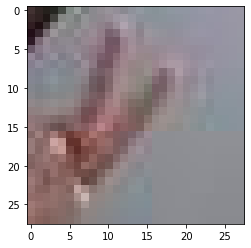

In [9]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

## ♣ 학습결과 
### 이미지를 만드는 과정에서 과도하게 알아 볼 수 없는 경우가 많이 발생하여 초기 모델을 만들고 학습시켰을 때, 결과가 좋지 못하였다.  epoch를 10, 50, 100으로 늘리거나 feature값 등을 변경하여 학습 횟수를 늘렸지만 accuracy를 올릴 순 없었다.  이후 좀더 선명하게 찍힌 이미지를 train이미지에 넣고 학습을 시켜 보았다.  그 결과 이전보다 나아진 정확도를 확인할 수 있었다.  이 결과를 통해서 학습에 필요한 데이터의 질의 중요성을 알 수 있었다.